In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

#1.Skin Detection

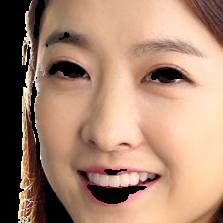

In [2]:
img_path = "/content/drive/MyDrive/cropped_face/웜톤/박보영.jpg"
#Open a simple image
img=cv2.imread(img_path)

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

# 피부영역을 어둡게 표현하기 위해 bitwise_not연산 사용
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

#show results
# cv2_imshow(YCrCb_result)
cv2_imshow(YCrCb_skin_detected)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

# 경로 설정
input_folder = "/content/drive/MyDrive/cropped_face/웜톤"
output_folder = "/content/drive/MyDrive/skin_detected"

# 새로운 폴더 생성
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 이미지들에 대해 반복
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # 이미지 경로
        img_path = os.path.join(input_folder, filename)

        # 이미지 읽기
        img = cv2.imread(img_path)

        # 컬러 공간 변환
        img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

        # 피부 검출
        YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
        YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
        YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

        # 저장할 이미지 경로
        output_path = os.path.join(output_folder, filename)

        # 이미지 저장
        cv2.imwrite(output_path, YCrCb_skin_detected)


In [5]:
import os

# 경로 설정
input_folder = "/content/drive/MyDrive/cropped_face/쿨톤"
output_folder = "/content/drive/MyDrive/skin_detected"

# 새로운 폴더 생성
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 이미지들에 대해 반복
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # 이미지 경로
        img_path = os.path.join(input_folder, filename)

        # 이미지 읽기
        img = cv2.imread(img_path)

        # 컬러 공간 변환
        img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

        # 피부 검출
        YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
        YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
        YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

        # 저장할 이미지 경로
        output_path = os.path.join(output_folder, filename)

        # 이미지 저장
        cv2.imwrite(output_path, YCrCb_skin_detected)


In [6]:
folder_path = '/content/drive/MyDrive/skin_detected'

file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print("폴더 내 파일 개수:", file_count)

폴더 내 파일 개수: 99


In [7]:
spring_tone = [253.75, 153.55, 152]  # 빨간색
summer_tone = [254, 291.25, 164.5]  # 파란색
fall_tone = [240.75, 199.25, 132.75]  # 파란색
winter_tone = [240, 201.5, 129.5]  # 파란색

def zero_shot_classification(color_vector):
    spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
    summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
    fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
    winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))

    if spring_similarity > summer_similarity and spring_similarity > fall_similarity and spring_similarity > winter_similarity:
        return "봄 웜톤"
    elif summer_similarity > spring_similarity and summer_similarity > fall_similarity and summer_similarity > winter_similarity:
        return "여름 쿨톤"
    elif fall_similarity > spring_similarity and fall_similarity > summer_similarity and fall_similarity > winter_similarity:
        return "가을 웜톤"
    else:
        return "겨울 쿨톤"

In [8]:
def classify_image(image):
    image = cv2.imread(image) ## 함수로 라벨 반환 시 사용
    image = image / 255.0  # Normalize image to 0-1 range
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # Convert all pixels in the image to a 1D vector

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    spring_tone_count = color_labels.count('봄 웜톤')
    summer_tone_count = color_labels.count('여름 쿨톤')
    fall_tone_count = color_labels.count('가을 웜톤')
    winter_tone_count = color_labels.count('겨울 쿨톤')

    total_count = len(color_labels)

    spring_tone_ratio = spring_tone_count / total_count
    summer_tone_ratio = summer_tone_count / total_count
    fall_tone_ratio = fall_tone_count / total_count
    winter_tone_ratio = winter_tone_count / total_count

    ratio_sum = spring_tone_ratio + summer_tone_ratio + fall_tone_ratio + winter_tone_ratio

    spring_tone_ratio = spring_tone_ratio / ratio_sum * 100
    summer_tone_ratio = summer_tone_ratio / ratio_sum * 100
    fall_tone_ratio = fall_tone_ratio / ratio_sum * 100
    winter_tone_ratio = winter_tone_ratio / ratio_sum * 100

    return f"봄 웜톤: {spring_tone_ratio:.2f}%\n여름 쿨톤: {summer_tone_ratio:.2f}%\n가을 웜톤: {fall_tone_ratio:.2f}%\n겨울 쿨톤: {winter_tone_ratio:.2f}%"



In [9]:
file_results = {}

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        file_path = os.path.join(folder_path, filename)
        result = classify_image(file_path)
        file_results[filename] = result

# 결과 출력
for filename, result in file_results.items():
    print(f"{filename} 파일의 결과:\n{result}\n")

<ipython-input-7-3b249918057d>:7: RuntimeWarning: invalid value encountered in double_scalars
  spring_similarity = np.dot(color_vector, spring_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(spring_tone))
<ipython-input-7-3b249918057d>:8: RuntimeWarning: invalid value encountered in double_scalars
  summer_similarity = np.dot(color_vector, summer_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(summer_tone))
<ipython-input-7-3b249918057d>:9: RuntimeWarning: invalid value encountered in double_scalars
  fall_similarity = np.dot(color_vector, fall_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(fall_tone))
<ipython-input-7-3b249918057d>:10: RuntimeWarning: invalid value encountered in double_scalars
  winter_similarity = np.dot(color_vector, winter_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(winter_tone))


하연수.jpg 파일의 결과:
봄 웜톤: 9.26%
여름 쿨톤: 80.53%
가을 웜톤: 0.00%
겨울 쿨톤: 10.21%

한선화.jpg 파일의 결과:
봄 웜톤: 13.31%
여름 쿨톤: 83.82%
가을 웜톤: 0.00%
겨울 쿨톤: 2.87%

제시.jpg 파일의 결과:
봄 웜톤: 24.15%
여름 쿨톤: 67.81%
가을 웜톤: 0.00%
겨울 쿨톤: 8.04%

이효리.jpg 파일의 결과:
봄 웜톤: 8.83%
여름 쿨톤: 87.83%
가을 웜톤: 0.00%
겨울 쿨톤: 3.34%

이민정.jpg 파일의 결과:
봄 웜톤: 6.24%
여름 쿨톤: 89.29%
가을 웜톤: 0.00%
겨울 쿨톤: 4.46%

탕웨이.jpg 파일의 결과:
봄 웜톤: 12.10%
여름 쿨톤: 75.08%
가을 웜톤: 0.00%
겨울 쿨톤: 12.81%

혜리.jpg 파일의 결과:
봄 웜톤: 8.60%
여름 쿨톤: 90.09%
가을 웜톤: 0.00%
겨울 쿨톤: 1.31%

한예슬.jpg 파일의 결과:
봄 웜톤: 18.73%
여름 쿨톤: 73.16%
가을 웜톤: 0.00%
겨울 쿨톤: 8.11%

전지현.jpg 파일의 결과:
봄 웜톤: 44.54%
여름 쿨톤: 41.52%
가을 웜톤: 0.13%
겨울 쿨톤: 13.81%

윤아.jpg 파일의 결과:
봄 웜톤: 10.27%
여름 쿨톤: 78.32%
가을 웜톤: 0.00%
겨울 쿨톤: 11.41%

효린.jpeg 파일의 결과:
봄 웜톤: 6.74%
여름 쿨톤: 82.61%
가을 웜톤: 0.00%
겨울 쿨톤: 10.65%

수애.jpg 파일의 결과:
봄 웜톤: 11.55%
여름 쿨톤: 68.64%
가을 웜톤: 0.00%
겨울 쿨톤: 19.81%

유빈.jpg 파일의 결과:
봄 웜톤: 6.70%
여름 쿨톤: 93.12%
가을 웜톤: 0.00%
겨울 쿨톤: 0.19%

조이.jpg 파일의 결과:
봄 웜톤: 22.92%
여름 쿨톤: 69.93%
가을 웜톤